### Import Libraries 

In [24]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

### Import the dataset

In [25]:
series = pd.read_csv('daily-min-temperatures.csv', index_col=0)
series.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


### Plot the Time-series 

Text(0, 0.5, 'Min Temp')

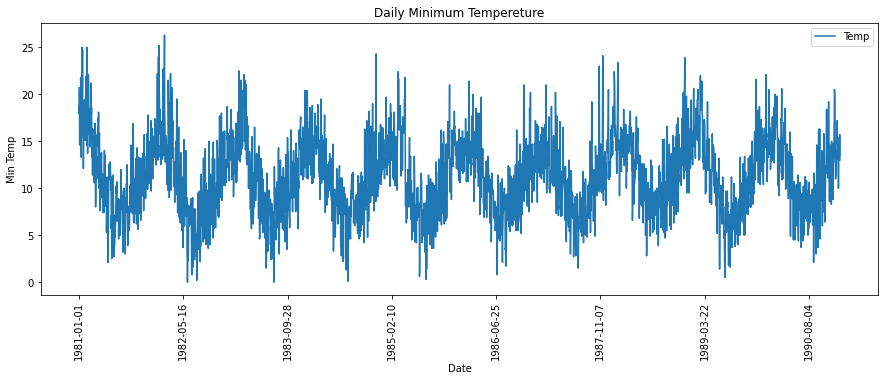

In [26]:
series.plot(figsize=(15, 5))
plt.xticks(rotation=90)
plt.title("Daily Minimum Tempereture")
plt.ylabel('Min Temp')

### Important Libraries for Autoregressive Model

In [27]:
from pandas.plotting import lag_plot, autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt

### Plotting the lag plot to visualize serial correlation

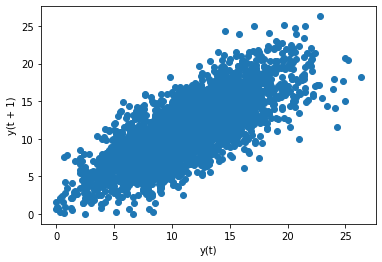

In [28]:
lag_plot(series)
plt.show()

### Serial correlation 

In [29]:
values = pd.DataFrame(series.values)
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
print(dataframe.head(3))
print()
result = dataframe.corr()
print(result)

    t-1   t+1
0   NaN  20.7
1  20.7  17.9
2  17.9  18.8

         t-1      t+1
t-1  1.00000  0.77487
t+1  0.77487  1.00000


### Plot of Autocorrelation 

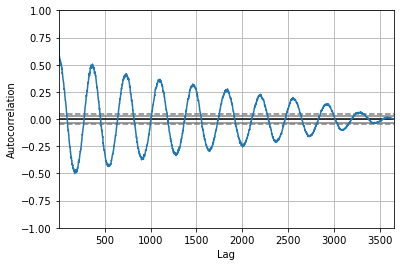

In [30]:
autocorrelation_plot(series)
plt.show()

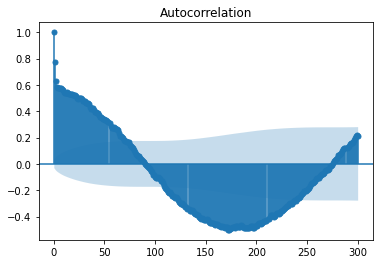

In [31]:
plot_acf(series, lags=300)
plt.show()

### Fitting Autoregression Model to Data

###### split dataset

In [44]:
X = series.values
train, test = X[1:len(X)-100], X[len(X)-100:]
print('Train size is: {}'.format(train.shape[0]))
print('Test size is: {}'.format(test.shape[0]))

Train size is: 3549
Test size is: 100


##### train autoregression

In [45]:
model = AutoReg(train, lags=40)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)

Coefficients: [ 5.99914229e-01  5.90742055e-01 -9.03350636e-02  4.50701332e-02
  4.05900313e-02  3.97831323e-02  2.24278526e-02  4.61512733e-02
  1.93150692e-02  3.13800253e-02  2.58246414e-04  7.61067072e-03
  2.01440001e-02  2.11521978e-02  3.59522562e-03  2.57588712e-02
  7.08254563e-03  1.37421919e-02  4.67834802e-02 -1.81985568e-02
  3.09691366e-02  1.67073512e-02  1.26669977e-02 -1.74997073e-02
  4.01057338e-03  1.26719755e-02  2.07903517e-02  1.22025020e-02
  1.03894156e-02  4.05623948e-04 -1.44213529e-02  4.26585347e-02
 -3.25986723e-02  9.80346338e-03  2.78889463e-02 -3.11717081e-03
 -2.45555561e-02 -3.00884483e-02  2.85365891e-02 -8.02516664e-03
 -2.76578739e-02]


##### make predictions

In [46]:
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted = %.3f, expected = %.3f' % (predictions[i], test[i]))

predicted = 8.061, expected = 5.200
predicted = 9.033, expected = 10.600
predicted = 9.128, expected = 16.300
predicted = 9.066, expected = 9.800
predicted = 9.219, expected = 4.600
predicted = 9.569, expected = 11.100
predicted = 9.527, expected = 8.700
predicted = 8.921, expected = 10.000
predicted = 9.385, expected = 11.300
predicted = 9.847, expected = 10.500
predicted = 10.240, expected = 9.900
predicted = 9.386, expected = 11.000
predicted = 8.772, expected = 14.000
predicted = 9.641, expected = 9.200
predicted = 10.051, expected = 9.800
predicted = 9.992, expected = 6.000
predicted = 9.464, expected = 9.800
predicted = 9.864, expected = 9.200
predicted = 10.055, expected = 11.800
predicted = 9.596, expected = 10.300
predicted = 9.225, expected = 7.500
predicted = 9.647, expected = 7.700
predicted = 10.084, expected = 15.800
predicted = 10.168, expected = 14.600
predicted = 9.912, expected = 10.500
predicted = 9.500, expected = 11.300
predicted = 9.836, expected = 10.900
predicte

### Accessing the accuracy of the Autoregression model

In [47]:
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 3.875


### Ploting Predicted Vs Actual curves 

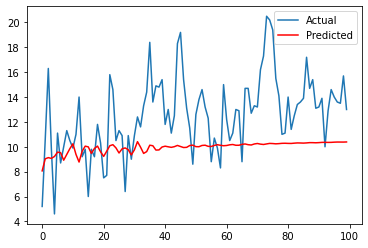

In [48]:
# plot results
plt.plot(test)
plt.plot(predictions, color='red')
plt.legend(['Actual', 'Predicted'])
plt.show()

### Passenger dataset

In [50]:
df=pd.read_csv('AirPassengers.csv')
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


<AxesSubplot:xlabel='Month'>

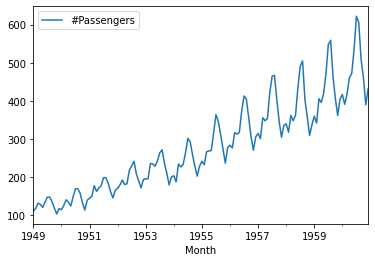

In [51]:
df.set_index('Month',inplace=True)
df.index=pd.to_datetime(df.index)
#drop null values
df.dropna(inplace=True)
df.plot()

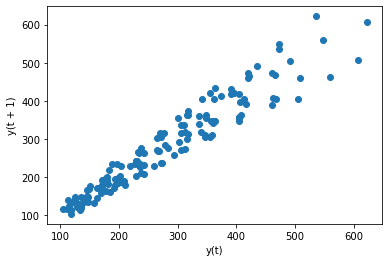

In [52]:
lag_plot(df)
plt.show()

In [53]:
values = pd.DataFrame(df.values)
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
print(dataframe.head(3))
print()
result = dataframe.corr()
print(result)

     t-1  t+1
0    NaN  112
1  112.0  118
2  118.0  132

          t-1       t+1
t-1  1.000000  0.960195
t+1  0.960195  1.000000


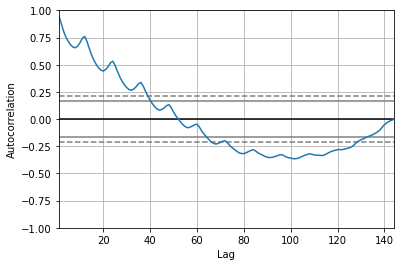

In [55]:
autocorrelation_plot(df)
plt.show()

In [57]:
X = df.values
train, test = X[1:len(X)-10], X[len(X)-10:]
print('Train size is: {}'.format(train.shape[0]))
print('Test size is: {}'.format(test.shape[0]))

Train size is: 133
Test size is: 10


In [58]:
model = AutoReg(train, lags=20)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)

Coefficients: [ 3.82315614  0.73599941  0.15695683 -0.04830507 -0.14882822  0.28836336
 -0.14406594  0.01369886 -0.17670006  0.25004895 -0.2714585   0.28226658
  0.80945861 -0.50884348 -0.44988553  0.27409591 -0.05688525 -0.02082158
 -0.19871148  0.29677529 -0.07296052]


In [60]:
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted = %.3f, actual = %.3f' % (predictions[i], test[i]))

predicted = 454.572, actual = 419.000
predicted = 444.969, actual = 461.000
predicted = 471.894, actual = 472.000
predicted = 527.850, actual = 535.000
predicted = 604.011, actual = 622.000
predicted = 621.558, actual = 606.000
predicted = 508.334, actual = 508.000
predicted = 447.226, actual = 461.000
predicted = 396.028, actual = 390.000
predicted = 445.817, actual = 432.000


In [61]:
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 15.988


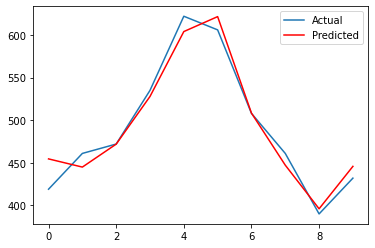

In [64]:
# plot results
plt.plot(test)
plt.plot(predictions, color='red')
plt.legend(['Actual', 'Predicted'])
plt.show()